In [63]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
from arftools import *
from matplotlib import cm
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from random import shuffle

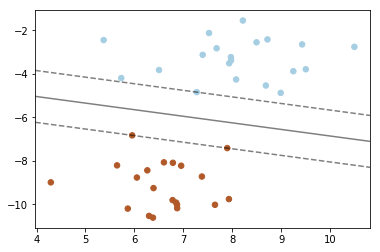

In [2]:
# we create 40 separable points
X, y = datasets.make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca() #Return handle of current axes.
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#print(xlim,ylim)

#create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30) #; print(xx)
yy = np.linspace(ylim[0], ylim[1], 30) #; print(yy)
YY, XX = np.meshgrid(yy, xx) #construit des matrices ou des tableaux 3-D https://plot.ly/numpy/meshgrid/
#print(XX); print(YY)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

In [54]:
def plot_frontiere_proba(data, f, step=20):
    grid, x, y = make_grid(data=data, step=step)
    plt.contourf(x, y, f(grid).reshape(x.shape), 255)

In [4]:
trainx,trainy =  gen_arti(nbex=100,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=100,data_type=0,epsilon=1)

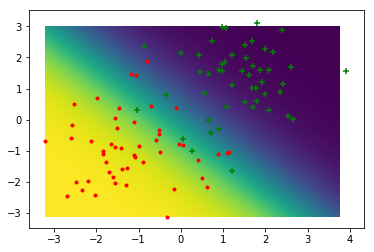

In [5]:
#Linéaire

linear_svm = svm.SVC(kernel='linear',probability = True, C=5) 
#predict_proba from plot_frontiere_proba is not available when  probability=False

linear_svm.fit(trainx,trainy)
plot_frontiere_proba(testx, lambda x : linear_svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

In [87]:

from sklearn.svm import SVC

class mySVM:
    def ___init___(self,kernel=None,c=None,g=None):
        self.kernel = kernel
        self.c = c
        self.g=g

    def fit(self,trainx,trainy,mykernel=None,myc = None,mygamma=None):
        # fit the model, don't regularize for illustration purposes
        self.kernel = mykernel if mykernel != None else self.kernel
        self.c = myc if myc != None else self.c
        
        
        if kernel == 'rbf' and mygamma !=None:
            self.g = mygamma
            print(self.g)
            self.svm = SVC( probability = True, kernel = self.kernel, C= self.c, gamma = mygamma)
        else:
            self.svm = SVC( probability = True, kernel = self.kernel, C= self.c)
            
        self.trainx = trainx
        self.trainy = trainy
        self.svm.fit(trainx, trainy)
    
    
    def affichage(self,datax,datay,g=None):
        plt.scatter(datax[:, 0], datax[:, 1], c=datay, s=30, cmap=plt.cm.Paired)

        # plot the decision function
        ax = plt.gca() #Return handle of current axes.
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        #print(xlim,ylim)

        #create grid to evaluate model
        xx = np.linspace(xlim[0], xlim[1], 100) #; print(xx)
        yy = np.linspace(ylim[0], ylim[1], 100) #; print(yy)
        YY, XX = np.meshgrid(yy, xx) #construit des matrices ou des tableaux 3-D https://plot.ly/numpy/meshgrid/
        #print(XX); print(YY)
        xy = np.vstack([XX.ravel(), YY.ravel()]).T
        Z = self.svm.decision_function(xy).reshape(XX.shape)

        # plot decision boundary and margins
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
        # plot support vectors
        ax.scatter(self.svm.support_vectors_[:, 0], self.svm.support_vectors_[:, 1], s=100,
                   linewidth=1, facecolors='none')
        #points dont les coefs sont non null, a l'interieur de la marge 
        for i in self.svm.support_:
            plt.scatter( datax[i][0]  , datax[i][1] ) 
        if self.kernel == 'rbf' and g!=None:
            plt.title(self.svm.kernel+ ", C =" +str(self.c) + " , G = " + str(g))
        else :
            plt.title(self.svm.kernel+ ", C =" +str(self.c))
        plt.show()
        
    def affichage1(self,datax,datay,g=None):
        if g != None :
            plt.title(self.svm.kernel+ ", C" +str(self.c) + ", G = " +str(g))
        else:
            plt.title(self.svm.kernel+ ", C " +str(self.c) ) 
        plot_frontiere_proba(datax, lambda x : self.svm.predict_proba(x)[:,0], step=50)
        plot_data(datax,datay)
        plt.show()
    def accuracy(self,testx,testy):
        self.testx = testx
        self.testy = testy
        #print("Points dont les coefs sont non nuls", self.svm.dual_coef_)
        #print("Nombre de données dans le dataX", len(testx))
        #print("Nombre de points dont les coefs sont non nuls", len(self.svm.dual_coef_[0])) # ou len(svmL.support_)
        #print("La plus grande penalité attribuée ", max(self.svm.dual_coef_[0]) )
        #print("Score_train", self.svm.score(self.trainx, self.trainy))
        #print("Score_test", self.svm.score(self.testx, self.testy))
        
        return self.svm.score(self.trainx, self.trainy), self.svm.score(self.testx, self.testy), len(self.svm.dual_coef_[0])

    def predict(sefl,x):
        return self.svm.predict(x)

            
plt.show()

# Teste avec des données linérement separables


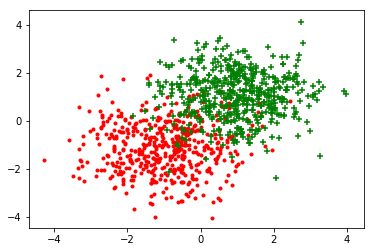

In [70]:

trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)
plot_data(trainx,trainy)
plt.show()

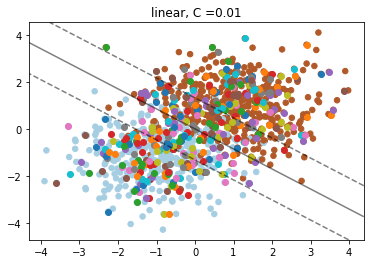

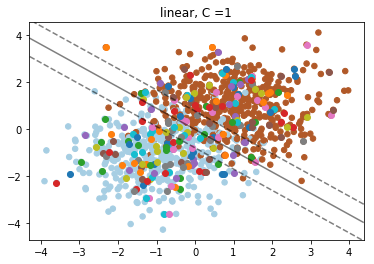

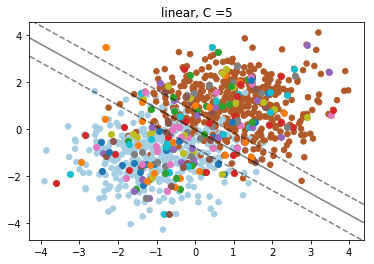

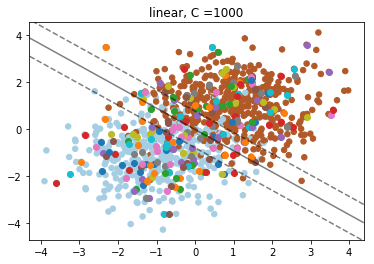

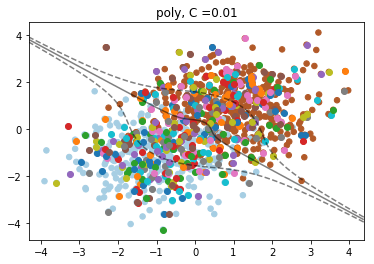

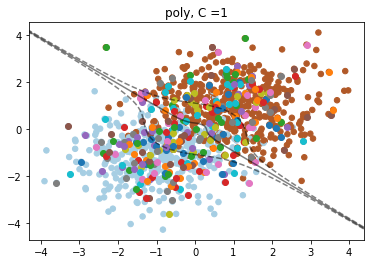

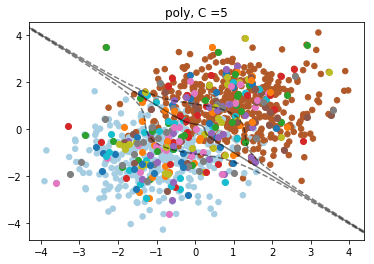

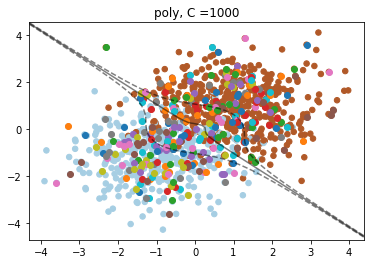

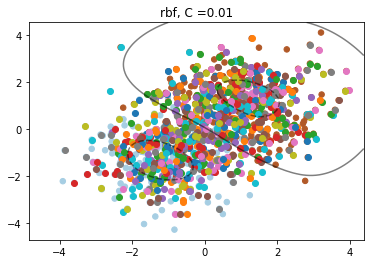

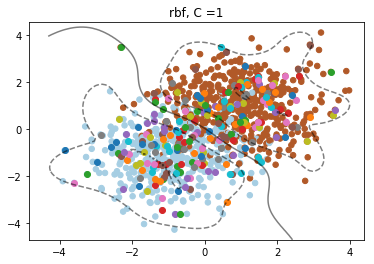

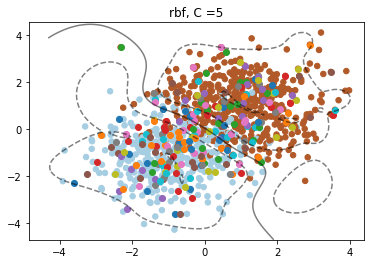

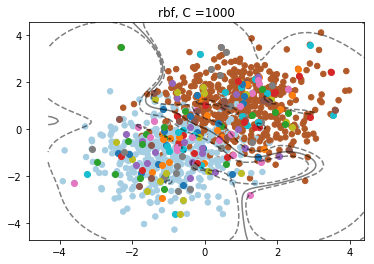

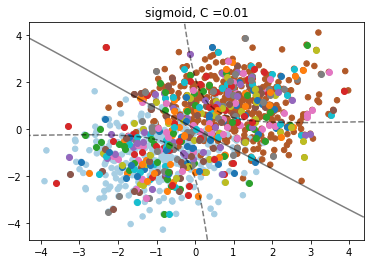

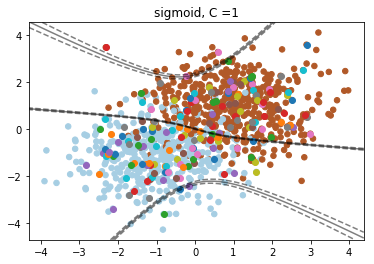

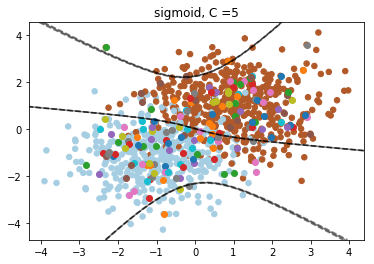

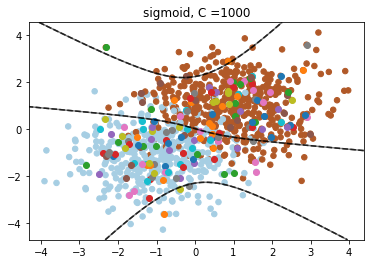

In [71]:
kernel = ['linear','poly','rbf','sigmoid']
C = [0.01, 1,5,1000]

svm = mySVM()

memo = dict()
for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints,c]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints,c]))
            

In [42]:
memo


{'linear': array([[  6.97000000e-01,   7.04000000e-01,   1.00000000e+03,
           1.00000000e-02],
        [  7.14000000e-01,   7.09000000e-01,   9.91000000e+02,
           1.00000000e+00],
        [  7.14000000e-01,   7.09000000e-01,   9.91000000e+02,
           5.00000000e+00],
        [  7.14000000e-01,   7.07000000e-01,   9.91000000e+02,
           1.00000000e+03]]),
 'poly': array([[  5.86000000e-01,   5.76000000e-01,   9.96000000e+02,
           1.00000000e-02],
        [  5.89000000e-01,   5.76000000e-01,   9.89000000e+02,
           1.00000000e+00],
        [  5.89000000e-01,   5.76000000e-01,   9.89000000e+02,
           5.00000000e+00],
        [  5.89000000e-01,   5.76000000e-01,   9.88000000e+02,
           1.00000000e+03]]),
 'rbf': array([[  9.78000000e-01,   9.79000000e-01,   7.94000000e+02,
           1.00000000e-02],
        [  9.80000000e-01,   9.79000000e-01,   1.06000000e+02,
           1.00000000e+00],
        [  9.81000000e-01,   9.78000000e-01,   7.30000000e+01

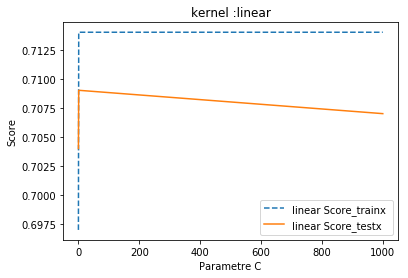

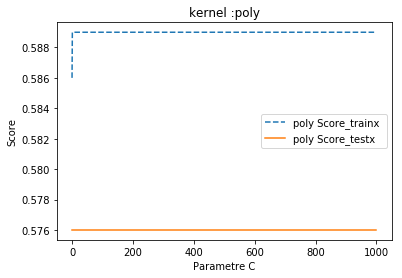

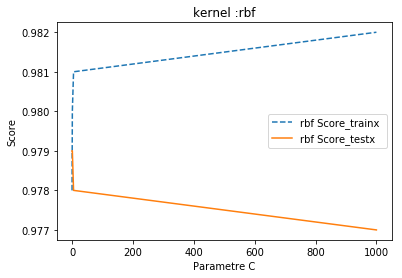

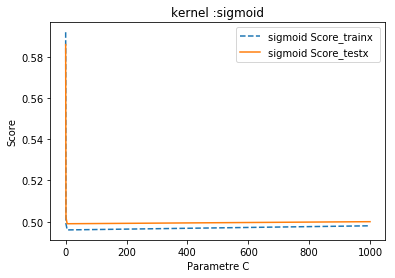

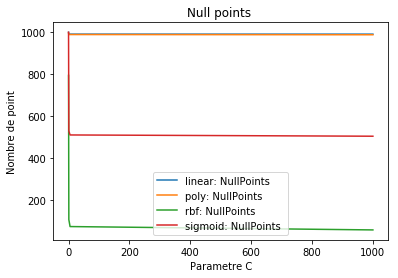

In [43]:
for m in memo.keys() :
    plt.title("kernel :" + str(m) )
    plt.plot(memo[m][0:,3],memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
    plt.plot(memo[m][0:,3],memo[m][0:,1],label=m + " Score_testx ")
    plt.legend(loc='best')
    plt.ylabel('Score')
    plt.xlabel('Parametre C')
    #plt.xlim(0,7)  
    
    plt.show()



for m in memo.keys():
    plt.title("Null points ")
    plt.plot(memo[m][0:,3],memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.ylabel('Nombre de point')
plt.xlabel('Parametre C')

plt.legend(loc='best')
plt.show()

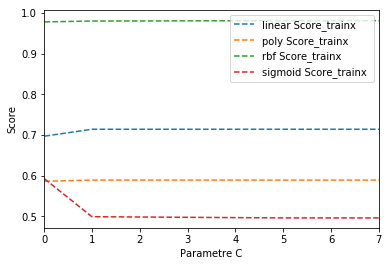

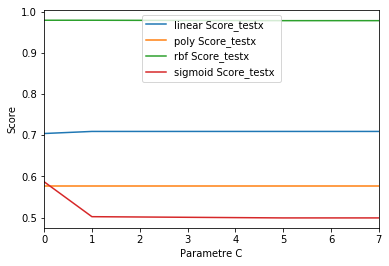

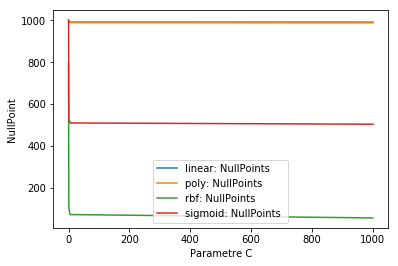

In [44]:
for m in memo.keys() :
    plt.plot(memo[m][0:,3],memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Parametre C')
plt.xlim(0,7)  
plt.show()

for m in memo.keys() :
    plt.plot(memo[m][0:,3],memo[m][0:,1],label=m + " Score_testx ")
plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Parametre C')
plt.xlim(0,7)  
plt.figure(figsize = (20,10))
plt.show()

for m in memo.keys():
    plt.plot(memo[m][0:,3],memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.legend(loc='best')
plt.ylabel('NullPoint')
plt.xlabel('Parametre C')
plt.show()

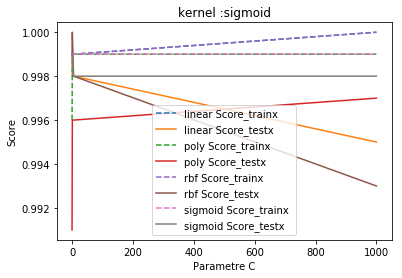

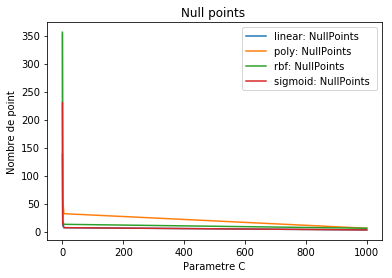

In [33]:
for m in memo.keys() :
    plt.title("kernel :" + str(m) )
    plt.plot(memo[m][0:,3],memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
    plt.plot(memo[m][0:,3],memo[m][0:,1],label=m + " Score_testx ")
    plt.legend(loc='best')
plt.ylabel('Score')
plt.xlabel('Parametre C')
 #plt.xlim(0,7)  
plt.show()



for m in memo.keys():
    plt.title("Null points ")
    plt.plot(memo[m][0:,3],memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.ylabel('Nombre de point')
plt.xlabel('Parametre C')

plt.legend(loc='best')
plt.show()

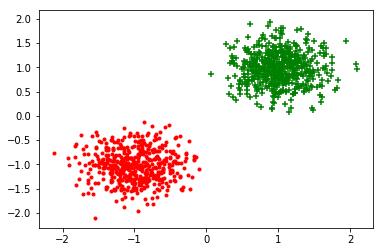

In [80]:
 ###Données plus brutés 
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=0.1)
plot_data(trainx,trainy)
plt.show()   


In [ ]:
kernel = ['linear'] #,'poly','rbf','sigmoid']
C = [0.01, 1, 5,100, 10000]

svm = mySVM()

memo = dict()
for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints]))
            

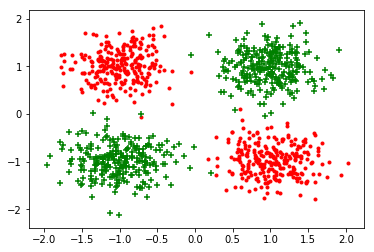

In [36]:
#Xor
 ###Données plus brutés 
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
testx,testy   =  gen_arti(nbex=1000,data_type=1,epsilon=0.1)
plot_data(trainx,trainy)
plt.show()   

kernel = ['linear','poly','rbf','sigmoid']
C = [0.0001, 1, 5,100, 10000]

svm = mySVM()
memo = dict()

for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage1(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints]))
            

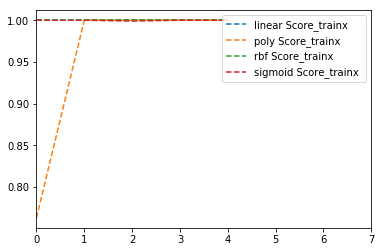

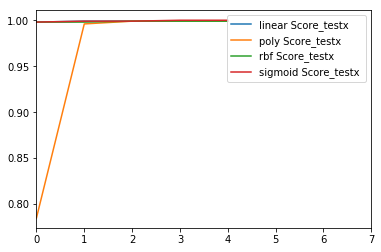

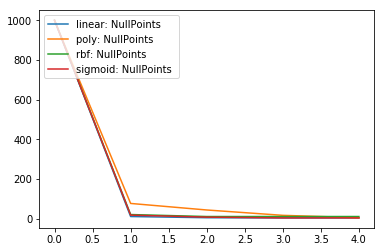

In [47]:
for m in memo.keys() :
    plt.plot(memo[m][0:,0],label= m + " Score_trainx ",linestyle='--')
plt.legend(loc='upper right')
plt.xlim(0,7)  
plt.show()

for m in memo.keys() :
    plt.plot(memo[m][0:,1],label=m + " Score_testx ")
plt.legend(loc='upper right')
plt.xlim(0,7)  
plt.figure(figsize = (20,10))
plt.show()

for m in memo.keys():
    plt.plot(memo[m][0:,2], label = str(m) + ": NullPoints ")
plt.legend(loc='upper left')
plt.show()

0.01 0.001


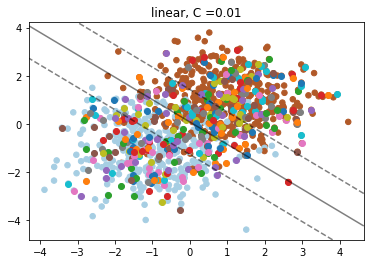

1 0.001


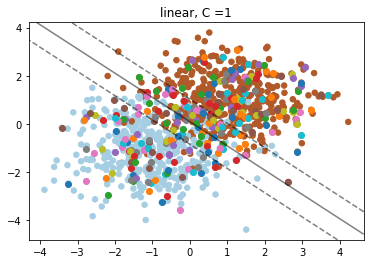

100 0.001


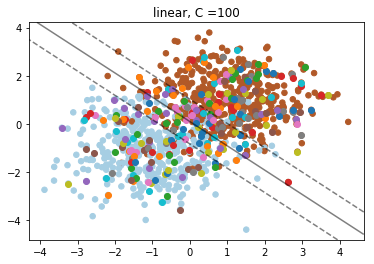

0.01 1


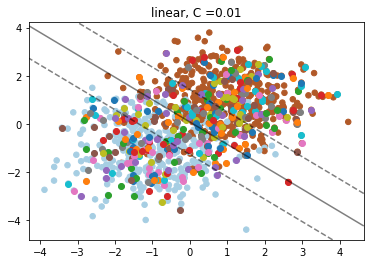

1 1


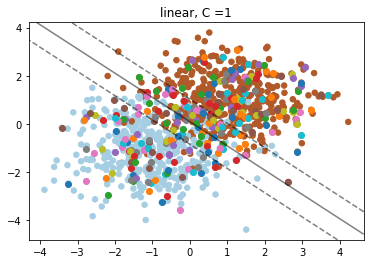

100 1


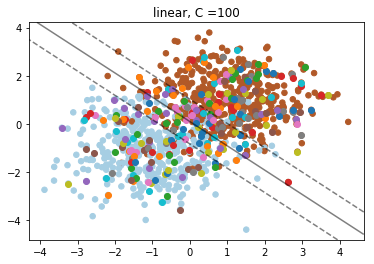

0.01 10


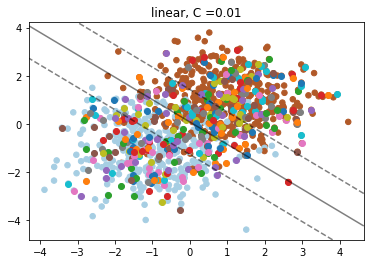

1 10


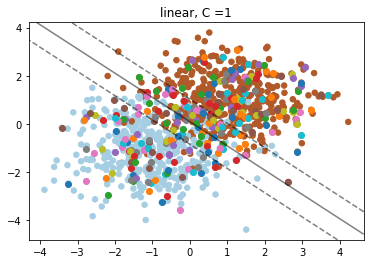

100 10


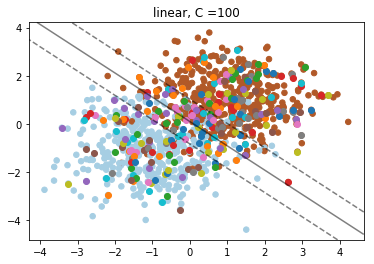

0.01 100


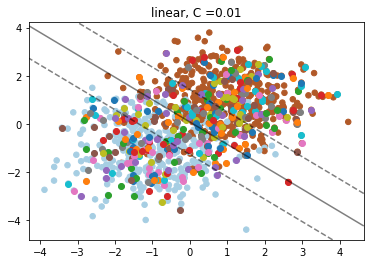

1 100


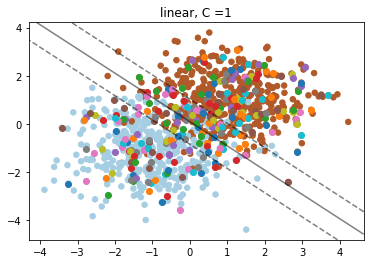

100 100


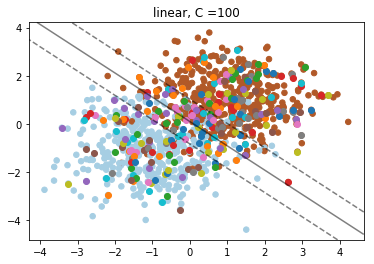

In [67]:
kernel = ['linear']
C = [0.01, 1, 100]
gamma = [0.001, 1, 10,100]
trainx,trainy =  gen_arti(nbex=1000,data_type=0,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=0,epsilon=1)
#
#memo = [[] for in range(len(kernel))]
memo2 = dict()

svm = mySVM()

for g in gamma:
    for c in C:   
        print(c,g)
        svm.fit(trainx,trainy,'linear',c,g)
        svm.affichage(testx,testy,g)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if g not in memo2.keys():
            memo2[g] = [scoreX,scoreY]
        else:
            memo2[g] = np.vstack(( memo2[g] ,[scoreX,scoreY]))


In [47]:
memo2

{0.001: array([[ 0.913,  0.915],
        [ 0.91 ,  0.906],
        [ 0.915,  0.905]]), 1: array([[ 0.913,  0.915],
        [ 0.91 ,  0.906],
        [ 0.915,  0.905]]), 10: array([[ 0.913,  0.915],
        [ 0.91 ,  0.906],
        [ 0.915,  0.905]]), 100: array([[ 0.913,  0.915],
        [ 0.91 ,  0.906],
        [ 0.915,  0.905]])}

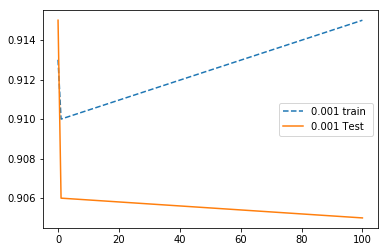

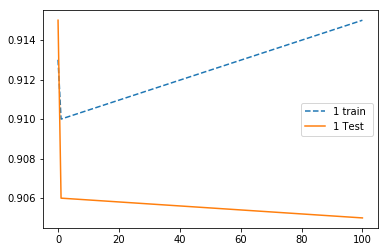

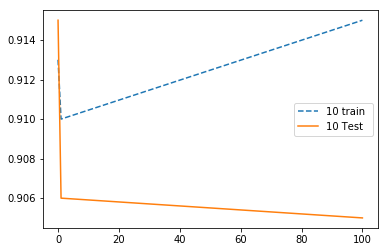

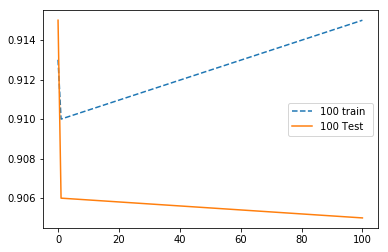

In [48]:
print()
for g in memo2.keys():
    
    m = 'rbf'
    
    plt.plot(C,memo2[g][0:,0],label= str(g) +" train ",linestyle='--')
    plt.plot(C,memo2[g][0:,1],label= str(g) +" Test ")
    plt.legend()

    plt.show()


In [ ]:
kernel = ['linear','poly','rbf','sigmoid']
C = [0.00001,1, 100, 10000]
trainx,trainy =  gen_arti(nbex=1000,data_type=1,epsilon=1)
testx,testy   =  gen_arti(nbex=1000,data_type=1,epsilon=1)
plot_data(trainx,trainy)
plt.show()
svm = mySVM()
#memo = [[] for in range(len(kernel))]
memo = dict()
for i, k  in enumerate(kernel) :
    for c in C:        
        svm.fit(trainx,trainy,k,c)
        svm.affichage(testx,testy)
        scoreX,scoreY, nullPoints = svm.accuracy(testx,testy)
        if k not in memo.keys():
            memo[k] = [scoreX,scoreY, nullPoints]
        else:
            memo[k] = np.vstack(( memo[k] ,[scoreX,scoreY, nullPoints]))
            

In [ ]:
#print(C)
for m in memo.keys():
    plt.title(m)
    for col in range(len(memo[m][0])-1):
        if col == 0:
            plt.plot(memo[m][0:,col], label=" Score_trainx ",linestyle='--')
        else:
            if col == 1:
                plt.plot(memo[m][:,col],label =" Score_testx ")
            #else:
            #    plt.plot(memo[m][0:,col], label = " NullPoints ")
    plt.legend()       
    plt.show()

In [88]:
## Grid search
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")
    plt.colorbar()



def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()

In [89]:
datax_train, datay_train = load_usps("USPS/USPS_train.txt")
datax_test, datay_test   = load_usps("USPS/USPS_test.txt")

In [90]:
def oneVsOne(datax_train,datay_train,class1,class2):
    
    lx2,ly2, lx1,ly1 =  [], [] , [], [] # datax_train, datay_train 

    for index, val in enumerate(datay_train):
        if val == class1:
            ly1.append(1)
            lx1.append(datax_train[index])
        else:
            if val == class2:
                ly2.append(-1)
                lx2.append(datax_train[index])
                
    #shuffle    
    lxy1 = list(zip(lx1, ly1))
    lxy2 = list(zip(lx2, ly2))
    shuffle(lxy1)
    shuffle(lxy2)
    lx1 , ly1 =  list(zip(*lxy1) )
    lx2 , ly2 =  list(zip(*lxy2) )

    #reblancage des classes
    lx1 = lx1[0:min(len(lx1),len(lx2))] 
    ly1 = ly1[0:len(lx1)]
    lx2 = lx2[0:len(lx1)]
    ly2 = ly2[0:len(lx1)]
    
    return np.array(lx1 + lx2),np.array(ly1 + ly2)

# Apprentissage multi-classe

### One-versus-one

In [92]:
def load_usps(fn):
    with open(fn,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp=np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="gray")

def plot_error(datax,datay,f,step=10):
    grid,x1list,x2list=make_grid(xmin=-4,xmax=4,ymin=-4,ymax=4)
    plt.contourf(x1list,x2list,np.array([f(datax,datay,w) for w in grid]).reshape(x1list.shape),25)
    plt.colorbar()
    plt.show()
    
    
datax_train, datay_train = load_usps("USPS/USPS_train.txt")
datax_test, datay_test = load_usps("USPS/USPS_test.txt")

In [102]:
from random import shuffle

class OneVsAll:
    def __init__(self, kernel='linear', C=1):
        self.kernel = kernel
        self.C = C
    
    def fit(self, X, y):
        self.classes = sorted(set(y))
        self.clfs = [svm.SVC(probability=True, kernel=self.kernel, C=self.C) for _ in range(len(self.classes))]
        for clf, cls in zip(self.clfs, self.classes):
            positifs = list(list(zip(*filter(lambda c: c[1] == cls, zip(X, y))))[0])
            negatifs = list(list(zip(*filter(lambda c: c[1] != cls, zip(X, y))))[0])
            #shuffle
            shuffle(positifs)
            shuffle(negatifs)
            #rebalancage des classes
            positifs = positifs[:min(len(positifs), len(negatifs))]
            negatifs = negatifs[:len(positifs)]
            #construction des labels binaires
            x_cls = positifs + negatifs
            y_cls = [1] * len(positifs) + [0] * len(positifs)
            #apprentissage
            clf.fit(x_cls, y_cls)
    
    def predict(self, X):
        probas = []
        for clf in self.clfs:
            probas.append(clf.predict_proba(X)[:, 1])
        probas = np.array(probas)
        return [self.classes[k] for k in probas.argmax(0)]
    
    def accuracy(self, X, y):
        return (np.array(self.predict(X)) == np.array(y)).mean()

In [104]:

#datay_train
kernel = ['linear','poly','rbf']

for k in kernel:
    print(k, end=':\t')
    clf = OneVsAll(kernel=k)
    clf.fit(datax_train, datay_train)
    print(clf.accuracy(datax_test, datay_test))

linear:	0.884404583956
poly:	0.922770303936
rbf:	0.925759840558


In [ ]:

svm = svm.SVC(probability = True, kernel='rbf', gamma=0.001)

svm.fit(trainx, trainy)

plot_frontiere_proba(testx, lambda x : svm.predict_proba(x)[:,0], step=50)
plot_data(testx,testy)
plt.show()

print("train", svm.score(trainx, trainy))
print("test", svm.score(testx, testy))

In [98]:
import numpy as np
import random
import matplotlib.pyplot as plt
import sklearn
from arftools import *
from matplotlib import cm
from sklearn import svm, datasets
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from random import shuffle

In [95]:
class OneVsOne:
    def __init__(self, kernel='linear', C=1):
        self.kernel = kernel
        self.C = C
    
    def fit(self, X, y):
        self.classes = sorted(set(y))
        self.clfs = {
            (c1, c2) : svm.SVC(probability=True, kernel=self.kernel, C=self.C) 
            for i, c1 in enumerate(self.classes)
            for c2 in self.classes[i:]
        }
        for ((c1, c2), clf) in zip(self.clfs.keys(), self.clfs.values()):
            positifs = list(list(zip(*filter(lambda c: c[1] == c1, zip(X, y))))[0])
            negatifs = list(list(zip(*filter(lambda c: c[1] == c2, zip(X, y))))[0])
            #shuffle
            shuffle(positifs)
            shuffle(negatifs)
            #balancage
            positifs = positifs[:min(len(positifs), len(negatifs))]
            negatifs = negatifs[:len(positifs)]
            #binarisation des labels
            x_train = positifs + negatifs
            y_train = [1] * len(positifs) + [0] * len(negatifs)
            #apprentissage
            clf.fit(x_train, y_train)
    
    def predict(self, X):
        clfs_proba = {}
        for ((c1, c2), clf) in zip(self.clfs.keys(), self.clfs.values()):
            pred = clf.predict_proba(X)[:, 1]
            if c1 in clfs_proba:
                clfs_proba[c1].append(pred)
            else:
                clfs_proba[c1] = [pred]
            if c2 in clfs_proba:
                clfs_proba[c2].append(1 - pred)
            else:
                clfs_proba[c2] = [1 - pred]
        #faire le vote moyen par classifieur
        for k, p in zip(clfs_proba.keys(), clfs_proba.values()):
            clfs_proba[k] = np.array(p).mean(0)
        #blip bloup
        return list(map(
            lambda i: self.classes[i], 
            np.array([clfs_proba[k] for k in self.classes]).argmax(0)
        ))
    
    def accuracy(self, X, y):
        return (np.array(self.predict(X)) == np.array(y)).mean()

       

In [99]:
clf = OneVsOne()
clf.fit(datax_train[:] , datay_train[:] )

In [ ]:
kernel = ['linear','rbf','poly','sigmoid']

for k in kernel:
    print(k, end=':\t')
    clf = OneVsOne(kernel=k)
    clf.fit(datax_train, datay_train)
    print(clf.accuracy(datax_test, datay_test))
    


# String kernel 

In [124]:
from collections import Counter

def string_similarity(s1, s2):
    w1 = s1.split()
    w2 = s2.split()
    common_words = set(w1).intersection(w2)
    c1 = Counter(w1)
    c2 = Counter(w2)
    return sum([c1[k] * c2[k] for k in common_words]) / (len(w1) + len(w2))

In [125]:
#string_similarity("le chien mange le chat", "le chat est bleu")
#string_similarity("le chien mange le chat", "le chat mange le chien")

In [117]:
from glob import glob
import codecs

In [173]:
files = glob("C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS/*.txt")

In [174]:
def read_file(path):
    f = codecs.open(path, encoding='utf-8')
    txt = f.read()
    f.close()
    return txt


In [175]:
texts = list(map(read_file, files))
#_ = texts.pop(7) 
print(len(texts))


files

9


['C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 2.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 3.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_LettresDeMonMoulin.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_tartarin_des_alpes.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_tartarin_de_tarascon.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_avare.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_don_juan.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_medecin_malgre_lui.txt']

In [176]:
import re
import unicodedata

def unicode2ascii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
    )

def normalize_string(s):
    s = unicode2ascii(s.lower().strip())
    s = re.sub(r"([.!?])", r"\\1", s)
    s = re.sub(r"[^a-zA-Z]+", r" ", s)
    return s

In [177]:
texts = list(map(normalize_string, texts))

def remove_stop_words(txt):
    sw = 'alors au aucuns aussi autre avant avec avoir bon car ce cela ces ceux chaque ci comme comment dans des du dedans dehors depuis devrait doit donc dos debut elle elles en encore essai est et eu fait faites fois font hors ici il ils je juste la le les leur la ma maintenant mais mes mine moins mon mot meme ni nommes notre nous ou ou par parce pas peut peu plupart pour pourquoi quand que quel quelle quelles quels qui sa sans ses seulement si sien son sont sous soyez sujet sur ta tandis tellement tels tes ton tous tout trop tres tu voient vont votre vous vu ca etaient etat etions ete etre'.split()
    for w in sw:
        txt = txt.replace(' ' + w + ' ', ' ')
    return txt

texts = list(map(remove_stop_words, texts))

In [178]:
NB_WORDS_MIN = (min(list(map(lambda s: len(s.split()), texts))))
shorten_text = lambda s: ' '.join(s.split()[:NB_WORDS_MIN])


M = np.zeros((len(texts), len(texts)))
for i, t in enumerate(texts):
    for j, tt in enumerate(texts):
        M[i, j] = string_similarity(shorten_text(t), shorten_text(tt))

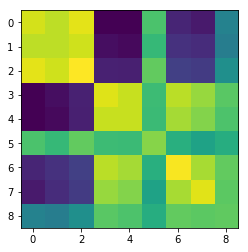

['C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 2.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882 tome 3.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Ainsworth, William Harrison, 1805-1882.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_LettresDeMonMoulin.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_tartarin_des_alpes.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Da_tartarin_de_tarascon.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_avare.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_don_juan.txt',
 'C:/Users/kherf/Desktop/AFR/Untitled Folder/USPS\\Mo_medecin_malgre_lui.txt']

In [179]:
plt.imshow(np.log(M) )
plt.show()

files